In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import pylab 

# This allows plots to appear directly in the notebook
%matplotlib inline

In [6]:
Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned.tsv.gz')
Cleaned_Data.head()

Dataset_Name           Method_Name  Test_Score n_neighbors   weights
0      soybean  KNeighborsClassifier    0.540698         100  distance
1      soybean  KNeighborsClassifier    0.563953         100  distance
2      soybean  KNeighborsClassifier    0.540698         100  distance
3      soybean  KNeighborsClassifier    0.540698         100  distance
4      soybean  KNeighborsClassifier    0.488372         100  distance

In [3]:
Cleaned_Data.shape

(2340, 5)

In [7]:
Cleaned_Data['weights_categorical'] = Cleaned_Data.weights.map({'unifrom':0, 'distance':1})
Cleaned_Data.head()

Dataset_Name           Method_Name  Test_Score n_neighbors   weights  \
0      soybean  KNeighborsClassifier    0.540698         100  distance   
1      soybean  KNeighborsClassifier    0.563953         100  distance   
2      soybean  KNeighborsClassifier    0.540698         100  distance   
3      soybean  KNeighborsClassifier    0.540698         100  distance   
4      soybean  KNeighborsClassifier    0.488372         100  distance   

   weights_categorical  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

# Trials to plot Parameters against the Test Score

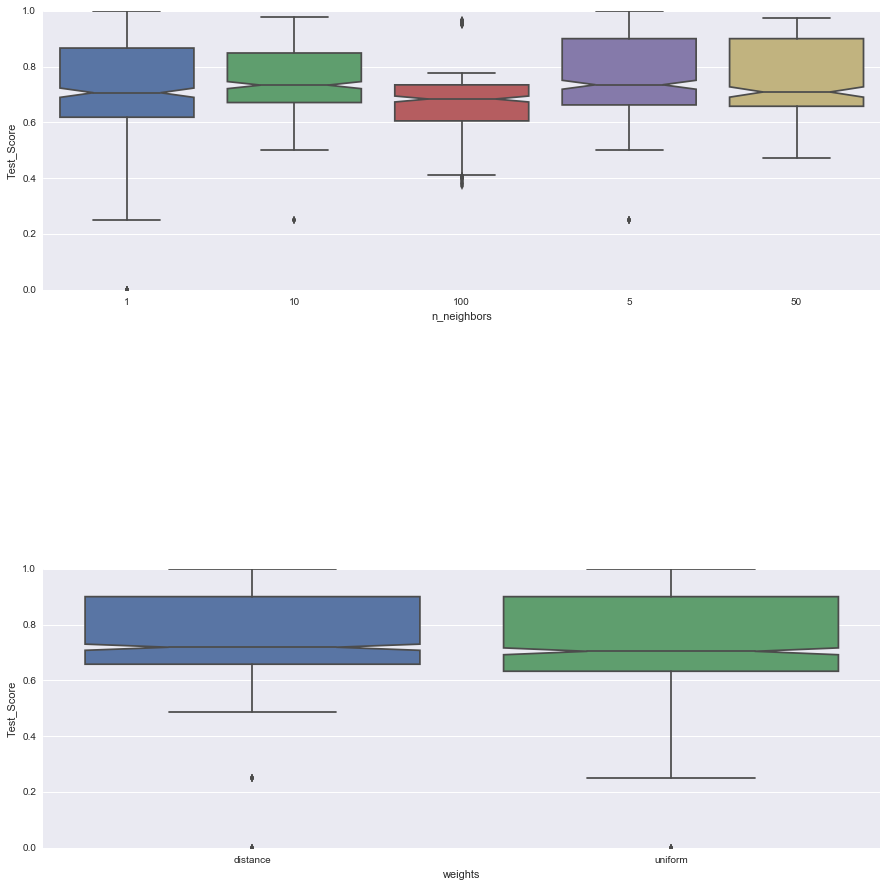

In [8]:
import seaborn as sns
sns.set()
fig, axs = plt.subplots(2,1, sharey=True, figsize=(15,15)) # 3 rows 1 column, figsize controls how big I want the fig to look
fig.subplots_adjust(hspace=1) # Give space between the subplots

#boxplots
sns.boxplot(data=Cleaned_Data, x='n_neighbors', y='Test_Score', notch='T',ax=axs[0])   #order of the n neighbors has to be sorted out
sns.boxplot(data=Cleaned_Data, x='weights', y='Test_Score', notch='T',ax=axs[1])


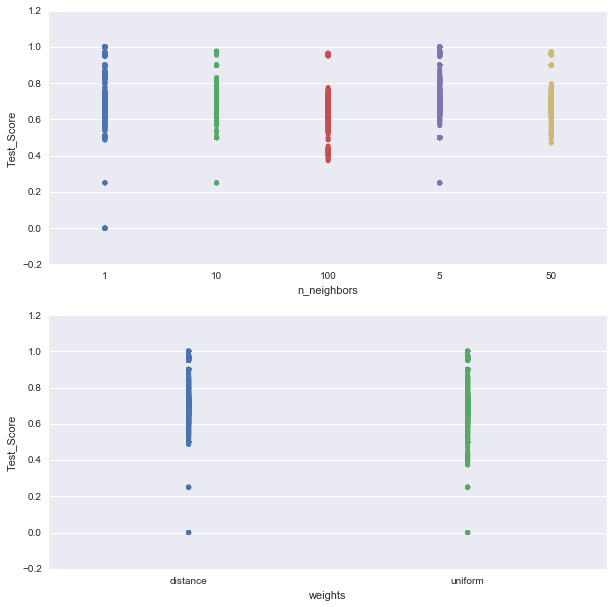

In [9]:
# Best for categorical variable or string type entry

fig, axs = plt.subplots(2,1, sharey=True, figsize=(10,10))

sns.stripplot(x="n_neighbors", y="Test_Score", data=Cleaned_Data, ax=axs[0])
sns.stripplot(x="weights", y="Test_Score", data=Cleaned_Data, ax=axs[1])


Analysis

To the read the boxplot, the following criterion was used:
1. Have the median as high as possible
2. The variance should be low (especially for the top 50% of the test scores). This means that the box should be as squeezed as 
   possible.
3. The lowest score should also be as high as possible.

Based upon these, we see that for the Test score as a function of n_neighbors does not do as well for n_neighbor equalling a large value like 100. The performance is relatively poor with rest to the lower values of n_neighbor. A value of 5 does well, with the low score highest of the lot, the high score be really high and variance comparable to other values. Infact 50 doesnt do bad either.

A really low value like 1 has really high variance that we see and based on this it is evident that for K-neighbors classifier values close to 5 (we know that industry standard is 3 and that in practise more often than not we use 10) like 5, 10, 50 do relatively well from performance point of view. 

For the variable weight, giving uniform weight to all points produces scores with higher variance. On the other hand when the weight is given as a factor of distance, the performance is better as it is lesser variable and the lowest scores reported are higher than that for the uniform weight parameter. Essentially this approach is definitely better since one can imagine giving higher weights to points that are closer to the point of interest than those which are relatively further. 




# Linear Regression on Combined Dataset

In [10]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Test_Score ~ n_neighbors + weights', data=Cleaned_Data).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     11.61
Date:                Sat, 09 Apr 2016   Prob (F-statistic):           4.26e-11
Time:                        15:56:43   Log-Likelihood:                 943.39
No. Observations:                2340   AIC:                            -1875.
Df Residuals:                    2334   BIC:                            -1840.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.7288      0.008     94.299      0.000         0.714     0.744
n_neighbors[T.10]      0.0212      0.010      2.089      0.037         0.001     0.041
n_neighbors[T.100]    -0.0301      0.011     -2.731      0.006        -0.052    -0.008
n_neighbors[T.5]       0.0427      0.010      4.337      0.000         0.023     0.062
n_neighbors[T.50]      0.0248      0.011      2.357      0.019         0.004     0.045
weights[T.uniform]    -0.0183      0.007     -2.733      0.006        -0.031    -0.005
==============================================================================
Omnibus:                      196.774   Durbin-Watson:                   0.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.117
Skew:                          -0.545   Prob(JB):                     6.50e-89
Kurtosis:                       4.726   Cond. No.                         6.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis:

DEGREES OF FREEDOM 
The degrees of freedom of the model are the number of predictor, or explanatory variables. The degrees of freedom of the residuals is the number of observations minus the degrees of freedom of the model, minus one.

R-SQUARED
The R-squared term is the coefficient of determination and it usually reflects how well the model fits the observed data.

ADJUSTED R-SQUARED
As you incorporate more predictor variables then R-squared typically increases because you’re trying to map a much larger input space onto a single scalar prediction. This is known as the Curse of Dimensionality. The adjusted R-squared takes into account the number of predictor variables (the degrees of freedom) and number of observations. 

F-STATISTICS
The null hypothesis of the F-test is that the data can be modeled accurately by setting the regression coefficients to zero. The alternative hypothesis is that at least one of the regression coefficients should be non-zero. If the F-distribution provides a p-value that is lower than some threshold alpha = 0.05, 0.01, then we reject the null hypothesis, and and say that our model is, in fact, “doing something with its life.” The F- statistic is computed as the ratio of two chi^2 distributed variables.
Here, we see that the p value of test is really low and hence we can reject null hypothesis test safely.

AIC/BIC
The Akaike information criterion (AIC) and the Bayesian information criterion (BIC) are based on the log-likelihood. Both measures introduce a penalty for model complexity, but the AIC penalizes complexity less severely than the BIC. Both measures are only used when trying to decide between different models. We would be inclined to choose the model that had the lower AIC or BIC value.

COEFFICIENTS
The coefficients show that as we saw before that n_neighbors[=5] have highest positive correlation among the other predictors. Infact the n_neighbor predictor is a stronger predictor than weights which is essentially negatively correlated with the test scores.

T-TEST
We use the t-test to test the null hypothesis that the coefficient of a given predictor variable is zero, implying that a given predictor has no appreciable effect on the response variable. The alternative hypothesis is that the predictor does contribute to the response. In testing we set some threshold, alpha = 0.05, 0.01, and if Pr(T> |t|)< alpha, then we reject the null hypothesis at our threshold alpha, otherwise we fail to reject the null hypothesis. The t-test generally allows us to evaluate the importance of different predictors, assuming that the residuals of the model are normally distributed about zero. If the residuals do not behave in this manner, then that suggests that there is some non-linearity between the variables, and that their t-tests should not be used to asses the importance of individual predictors. Furthermore, it might be best to try to modify the model so that the residuals do tend the cluster normally about zero. The t statistic is given by the ratio of the coefficient (or factor) of the predictor variable of interest, and its corresponding standard error. 

CONFIDENCE INTERVAL
The confidence interval is built using the standard error, the p-value from our T-test, and a critical value from a T-test having N-P degrees of freedom, where N is the number of observations and P is the number of model parameters, i.e., the number of predictor variables. The confidence interval is the the range of values we’d expect to find the parameter of interest, based on what we’ve observed. You will note that we have a confidence interval for predictor variable coefficient, and the constant term. A smaller confidence interval suggests that we are confident about the value of the estimated coefficient, or constant term. A larger confidence interval suggests that there is more uncertainty or variance in the estimated term. Again, let me reiterate that hypothesis testing is only one perspective. 

SKEWNESS AND KURTOSES
Skew and kurtosis refer to the shape of a (normal) distribution. Skewness is a measure of the asymmetry of a distribution, and kurtosis is a measure of its curvature, specifically how peaked the curve is. 

OMNIBUS TEST
The Omnibus test uses skewness and kurtosis to test the null hypothesis that a distribution is normal. In this case, we’re looking at the distribution of the residual. If we obtain a very small value for Pr(Omnibus), then the residuals are not normally distributed about zero, and we should maybe look at our model more closely. if either the skewness or kurtosis suggests non-normality, this test should pick it up.

DURBIN-WATSON TEST
The Durbin-Watson test checks for autocorrelation by looking at he residuals separated by some lag.The Durbin-Watson statistic is approximately equal to 2(1-r), where r is the sample autocorrelation. The statistic ranges from zero to four, and a value around two suggests that there is no autocorrelation. Values greater than two suggest negative correlation, and values less that one suggest positive correlation.

JARQUE-BERA TEST
The Jarque-Bera test is another test that considers skewness (S), and kurtosis (K). The null hypothesis is that the distribution is normal, that both the skewness and excess kurtosis equal zero, or alternatively, that the skewness is zero and the regular run-of-the-mill kurtosis is three. Unfortunately, with small samples the Jarque-Bera test is prone rejecting the null hypothesis–that the distribution is normal–when it is in fact true.

CONDITION NUMBER
The condition number measures the sensitivity of a function’s output to its input. When two predictor variables are highly correlated, which is called multicolinearity, the coefficients or factors of those predictor variables can fluctuate erratically for small changes in the data, or the model. Ideally, similar models should be similar, i.e., have approximately equal coefficients. Multicolinearity can cause numerical matrix inversion to crap out, or produce inaccurate results.We calculate the condition number by taking the eigenvalues of the product of the predictor variables (including the constant vector of ones) and then taking the square root of the ratio of the largest eigenvalue to the least eigenvlaue. If the condition number is greater than thirty, then the regression may have multicolinearity.

# Dividing the dataframe into independent datasets

In [11]:
Dataset_list=Cleaned_Data['Dataset_Name'].unique().tolist()
print(Dataset_list)
DatasetWiseData={}
for Dataset_name in Dataset_list:
    DatasetWiseData[Dataset_name] = Cleaned_Data[Cleaned_Data.Dataset_Name==Dataset_name]

['soybean', 'cars1', 'heart-c', 'solar-flare_1', 'pima', 'hypothyroid', 'shuttle-landing-control', 'sponge', 'trains']


In [21]:
# Save the file

import os
#os.mkdir('../Cleaned_Method_Wise_Data/DecisionTreeClassifier_cleaned')
DatasetWiseData['trains'].to_pickle('../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned/trains.tsv.gz')

In [ ]:
# Read the file

Dataset_DTC_Type = pd.read_pickle('../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned/cars1.tsv.gz')
print(Dataset_DTC_Type)

# Plot and Linear Regression Analysis performed dataset wise

cars1.tsv.gz
                            OLS Regression Results                            
Dep. Variable:             Test_Score   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     8.326
Date:                Sat, 09 Apr 2016   Prob (F-statistic):           2.24e-07
Time:                        15:56:48   Log-Likelihood:                 616.20
No. Observations:                 300   AIC:                            -1220.
Df Residuals:                     294   BIC:                            -1198.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              

C:\Users\Akshay\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


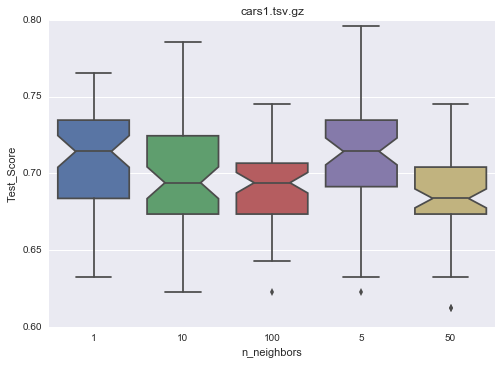

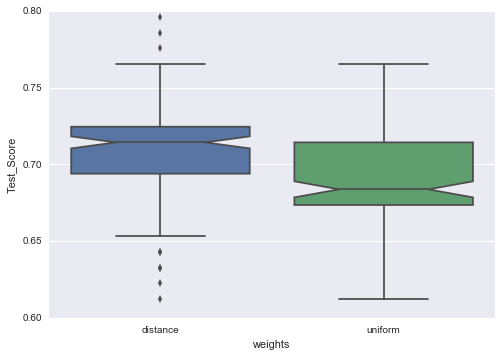

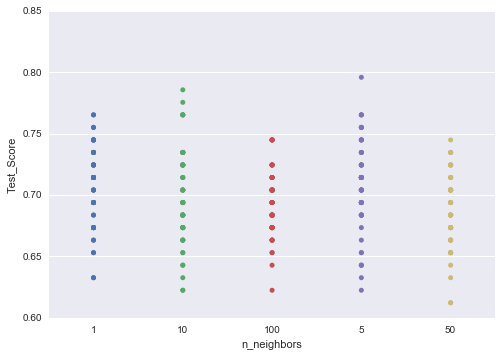

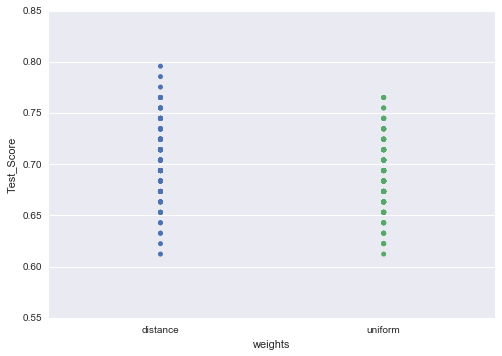

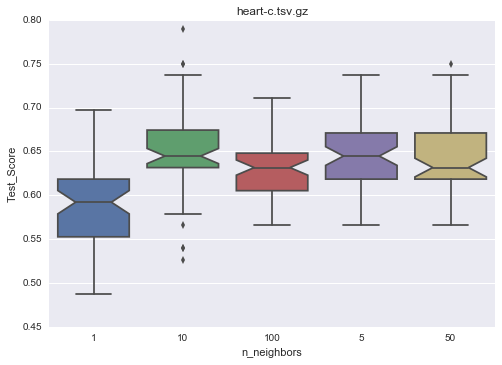

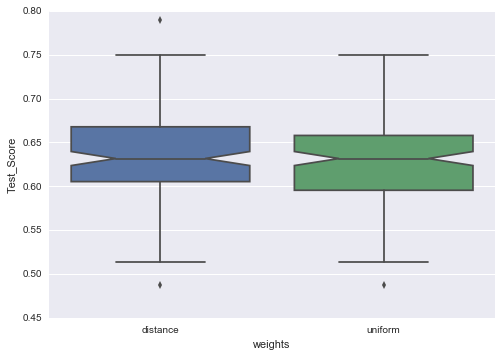

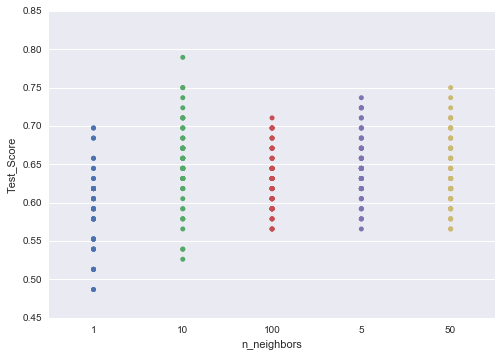

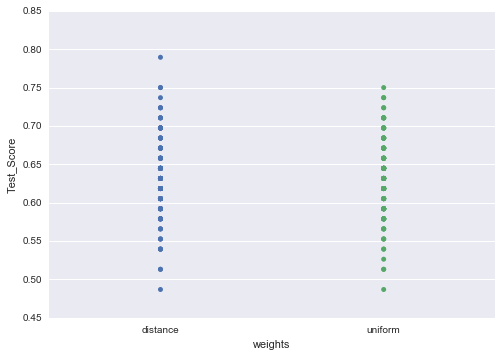

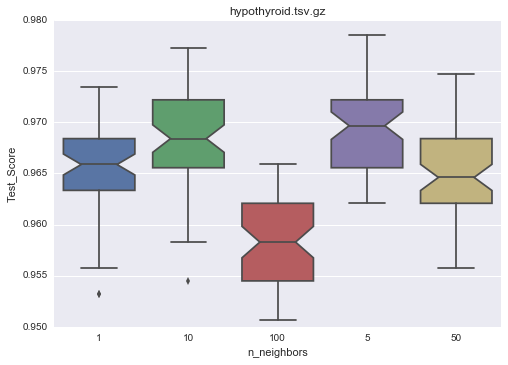

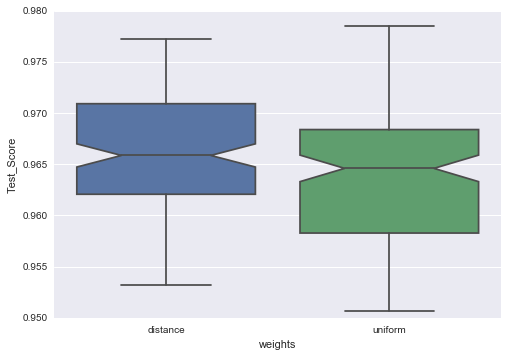

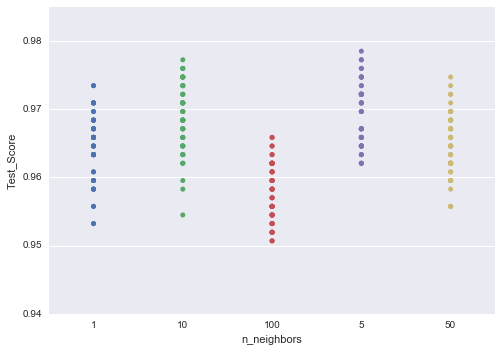

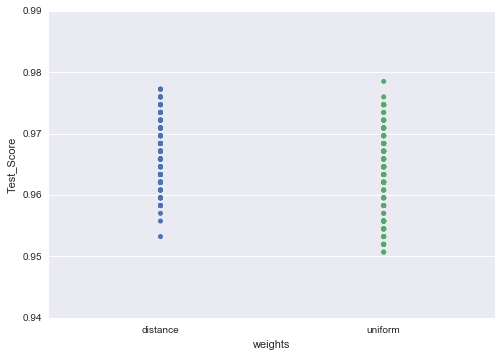

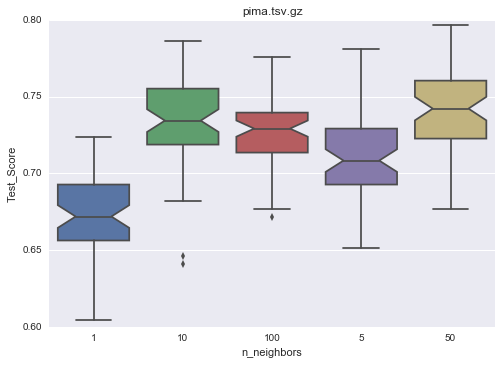

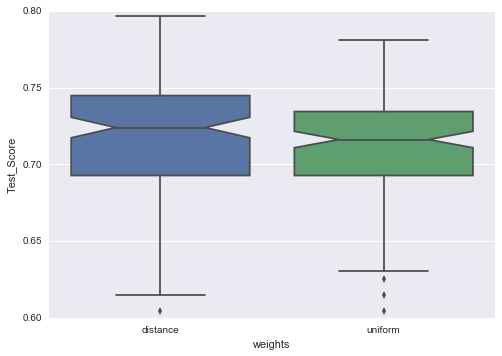

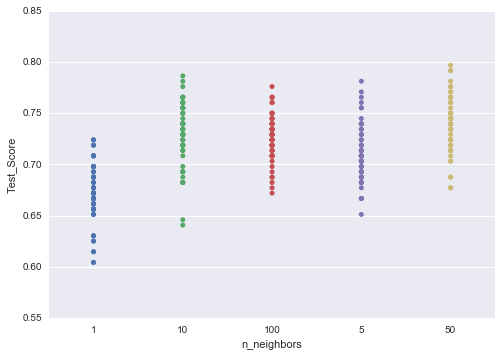

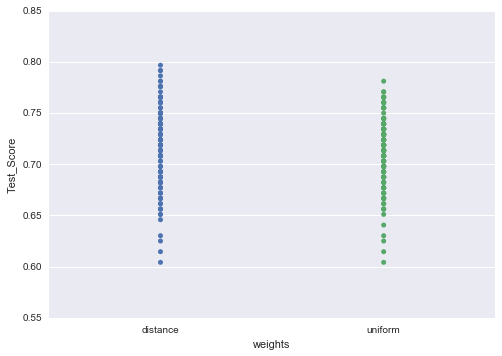

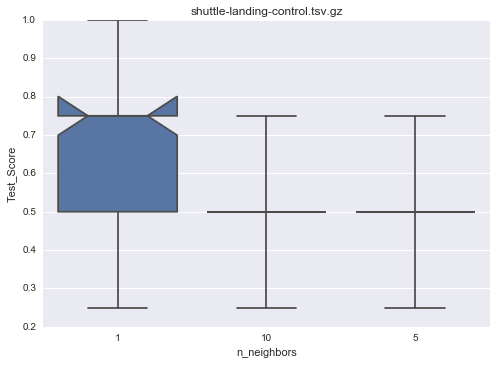

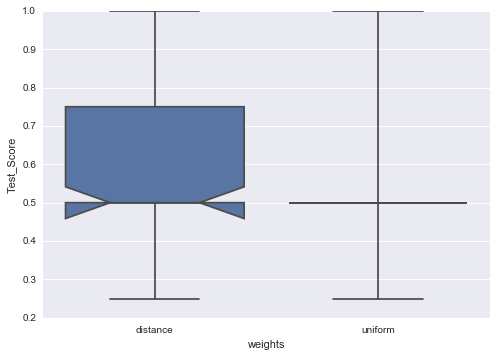

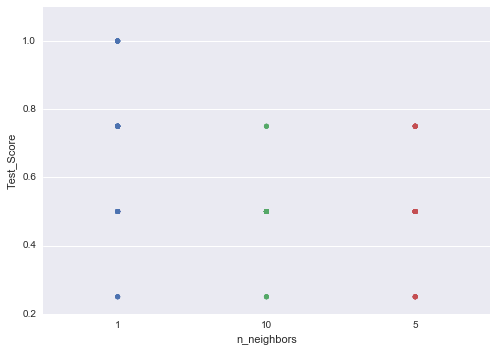

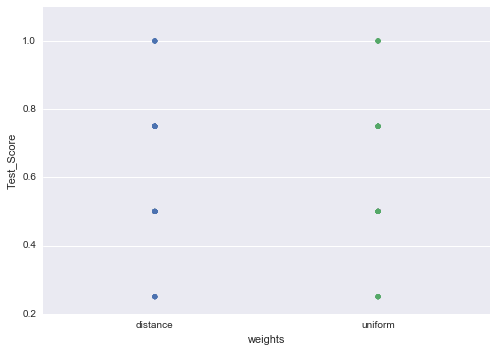

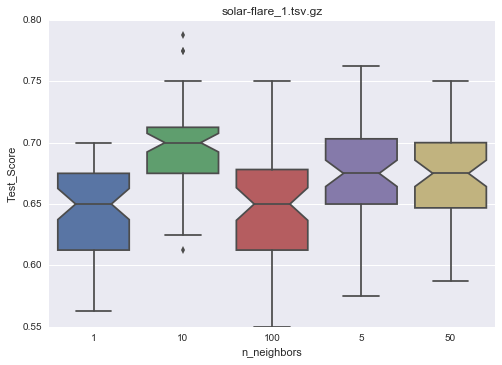

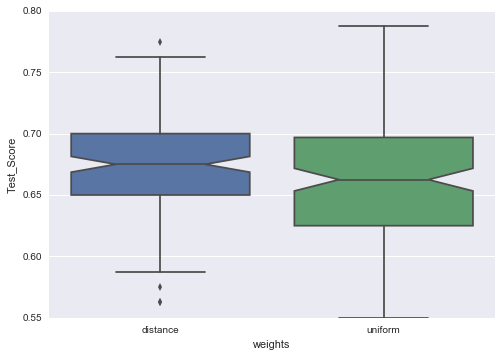

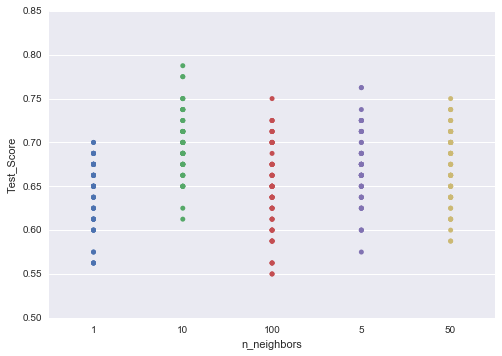

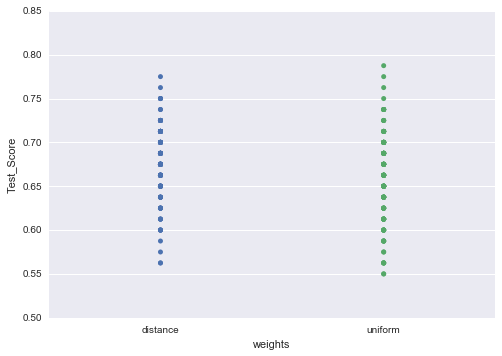

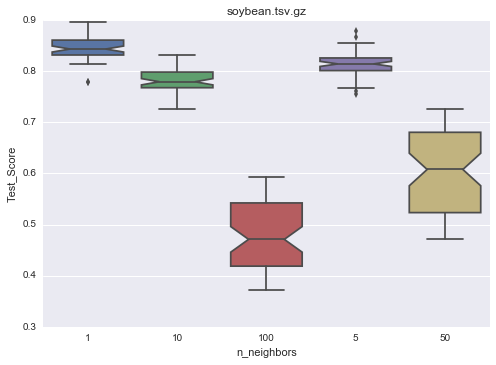

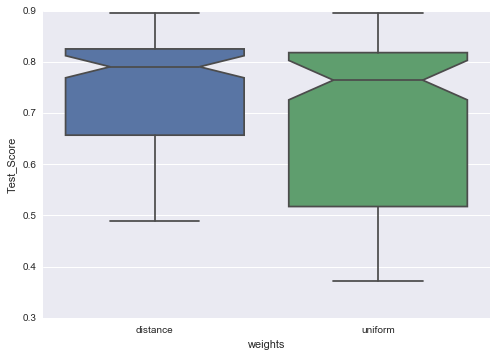

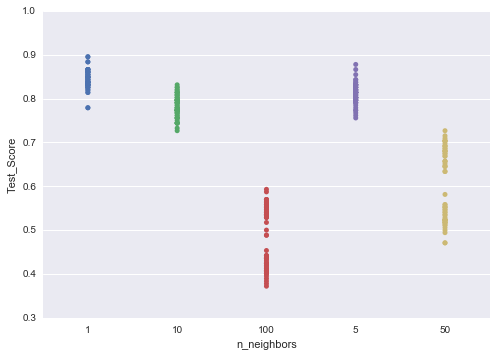

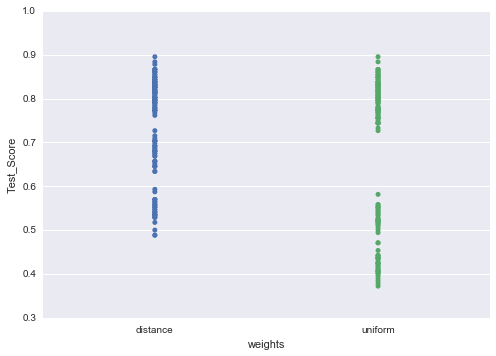

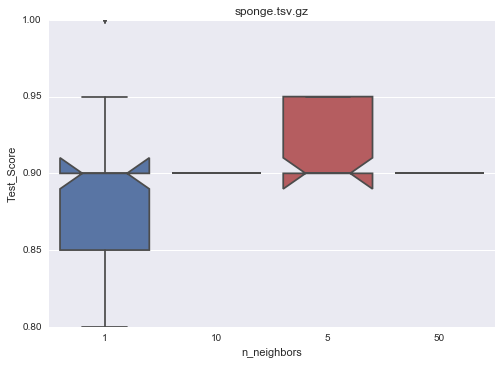

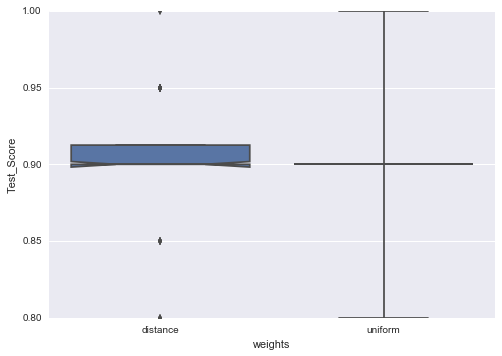

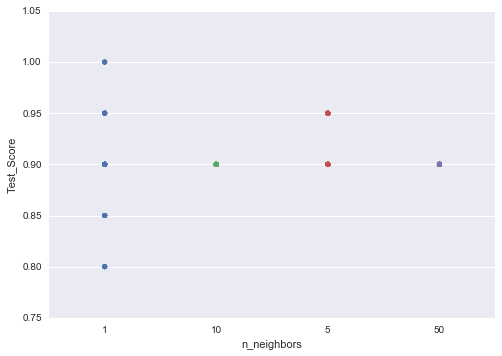

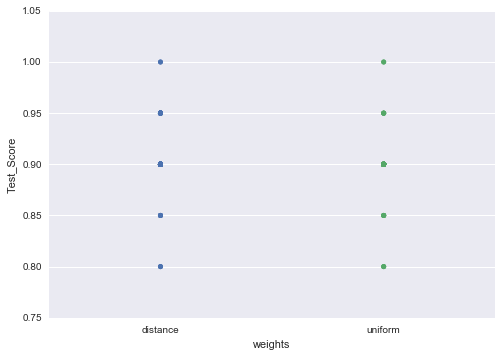

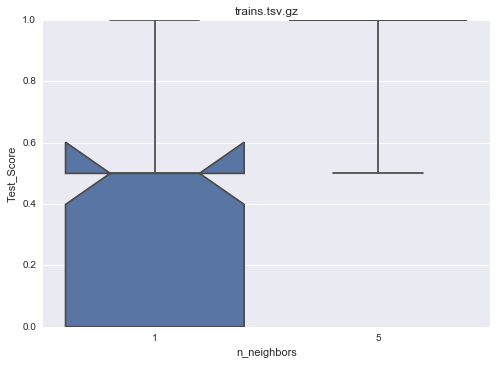

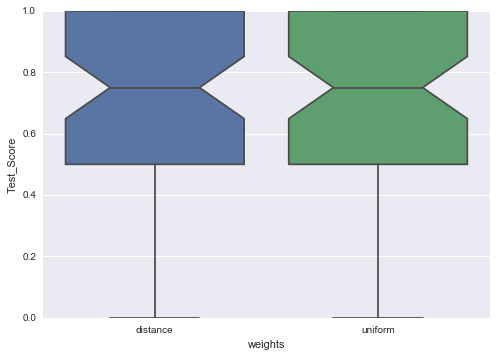

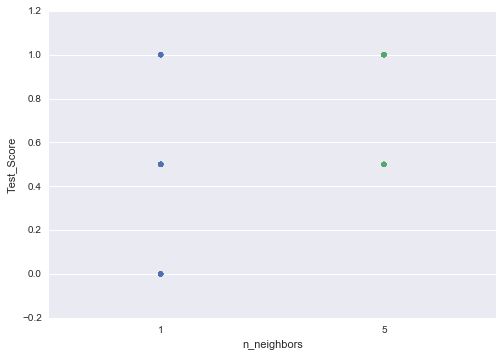

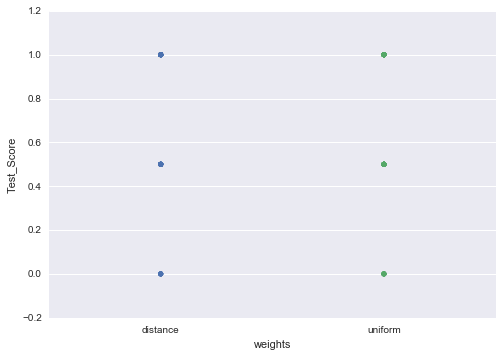

In [11]:
# Loop through the entire files in the folder, open then and run the codes....

import os
indir = '../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned/'
for root, dirs, filenames in os.walk(indir):
     for f in filenames:
        print(f)
        Dataset_Cleaned_Data = pd.read_pickle(indir+f)
        plt.figure()   
        sns.boxplot(data=Dataset_Cleaned_Data, x='n_neighbors', y='Test_Score', notch='T')
        sns.plt.title(f)
        plt.figure() 
        sns.boxplot(data=Dataset_Cleaned_Data, x='weights', y='Test_Score', notch='T')
        plt.figure() 
        sns.stripplot(x="n_neighbors", y="Test_Score", data=Dataset_Cleaned_Data)
        plt.figure() 
        sns.stripplot(x="weights", y="Test_Score", data=Dataset_Cleaned_Data)
        lm = smf.ols(formula='Test_Score ~ n_neighbors + weights', data=Dataset_Cleaned_Data).fit()
        print(lm.summary())

Analysis:

cars1:
5 and 10 neighbors show lot of variability here. The performance aint great either with highest test scores less than            0.8. Median scores highest for 1 and 5 nearest neaighbors. 100 has least variance. Distance weight continues to do better        than uniform weight.

heart-c:
1 neighbors does really bad. Here test scores acheived is really bad as compared to the previous datasets. 100 has least variability. 10, 5 and 50 are similar. Distance and Uniform perform similarly here.

hypothyroid:
This data set performs extremely well with test scores of 0.95 and upward. Even in them, 5 neighbors do the best amongst the others. The distance weight also does better than uniform one.

pima:
1 neighbor does really bad here. The variances in 10, 50 and 100 neighbors are almost the same. Just that the medians are slighly different. Interestingly though 5 neighbors have alot of variance. Also, the distance weight does worse than the uniform weight in this case!

shuttle-landing control:
Interesting!!
Note:Notched box plots apply a "notch" or narrowing of the box around the median. Notches are useful in offering a rough guide to significance of difference of medians; if the notches of two boxes do not overlap, this offers evidence of a statistically significant difference between the medians. The width of the notches is proportional to the interquartile range of the sample and inversely proportional to the square root of the size of the sample. However, there is uncertainty about the most appropriate multiplier (as this may vary depending on the similarity of the variances of the samples). One convention is to use +/-1.58*IQR/sqrt(n).
Thus, if we have this weird "flipped" appearance in the notched box plots, it simply means that the 1st quartile has a lower value than the confidence of the mean and vice versa for the 3rd quartile. Although it looks ugly, it's actually useful information about the (un)confidence of the median.
Here the 50% of the data with 10 and 5 neighbors take the same value as the median. That is strange!The same is true with the uniform weight parameter. The distance weight parameter also shows flipped nature.

solar-flare_1:
The test scores are poor. 100 neighbors have 50% of the points take test scores less than 0.65 with the lowest being 0. 5 has also got alot of variance while the 10 does decently off the lot. Again distance does better than the uniform parameter.

soybean:
The test scores are high here. 1 neighbor does tremendously well. 5 and 10 also do decently well. 100 does poorly. Distance does better than uniform since the variance is lower in the former while the highest scores achieved is the same.

sponge:
10 and 50 show no plot. Just a point. Same test score. The others have flipped box plots. The scores are towardd higher 0.8's and 0.9's. Uniform has variance which spreads the test score between 0 and 100. The distance has low variance and does significantly well with test scores of 0.9 and above.

trains:
The 1 neighbor does poorly on the test score and has a flipped box plot. On the other hand 10 has all points between 0.5 and 1. There is no box there anymore. The uniform and distance weight parameter do exactly the same. The spread encomprises completely from 0 to 1 test scores.

